<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk


In [10]:
train= pd.read_csv('C:/Users/Riddhi/Desktop/Big Data Final Project/train.csv')

print(train.shape)

(10550, 3)


In [11]:
train.head()

,id,analysis,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
#data cleaning, varifying if there are any null or empty lines

train.isnull().any() 

id          False
analysis    False
tweet       False
dtype: bool

In [13]:
# checking out the positive comments from the train set

train[train['analysis'] == 0].head(10)


,id,analysis,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [14]:
# checking out the negative comments from the train set 

train[train['analysis'] == 1].head(10)


,id,analysis,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


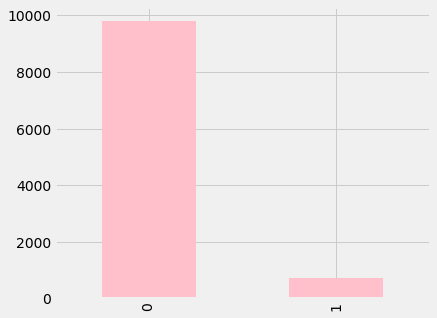

In [15]:
#presenting the O's vs 1s
train['analysis'].value_counts().plot.bar(color = 'pink', figsize = (6, 5))

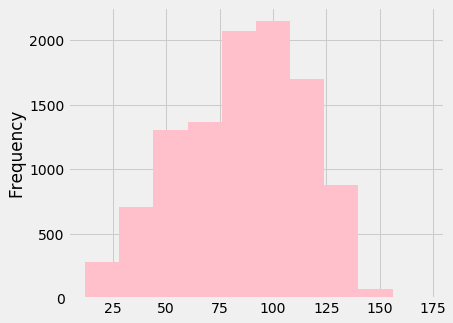

In [16]:
# checking the distribution of tweets in the data
train['len'] = train['tweet'].str.len()
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 5))

In [17]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
train.head(5)

,id,analysis,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [18]:
#statistical description of the Analysis
train.groupby('analysis').describe()

id                                                           \
           count         mean          std   min     25%     50%      75%   
analysis                                                                    
0         9814.0  5274.564602  3043.981533   1.0  2629.5  5273.5  7911.75   
1          736.0  5287.972826  3070.109844  14.0  2712.5  5337.5  7991.75   

                      len                                                 \
              max   count       mean        std   min   25%   50%    75%   
analysis                                                                   
0         10550.0  9814.0  84.855411  29.128410  12.0  63.0  88.0  107.0   
1         10535.0   736.0  90.976902  27.475521  12.0  69.0  98.0  112.0   

                 
            max  
analysis         
0         172.0  
1         143.0

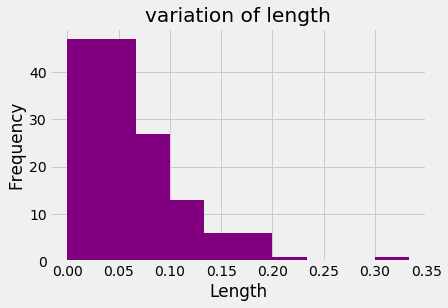

In [19]:
#graphing the data analysis by frequency 

train.groupby('len').mean()['analysis'].plot.hist(color = 'purple', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)



In [21]:
from wordcloud import WordCloud

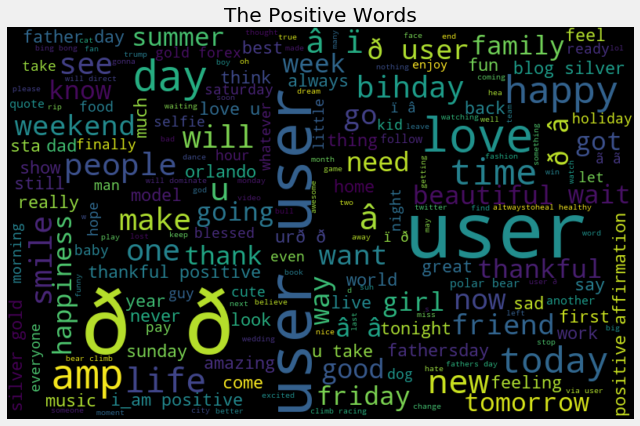

In [22]:
#Displaying postive words from data set
normal_words =' '.join([text for text in train['tweet'][train['analysis'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()


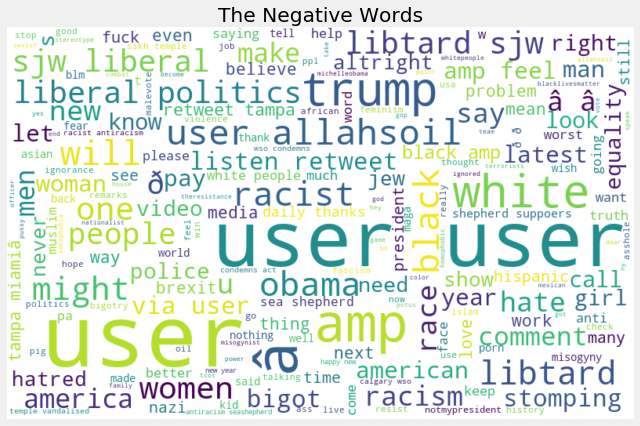

In [23]:
#Displaying negative words from data set
negative_words =' '.join([text for text in train['tweet'][train['analysis'] == 1]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [24]:
#cleaning process
#gathering the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
# extracting hashtags from data

hashtag_r = hashtag_extract(train['tweet'][train['analysis'] == 0]) #regular hashtags

# extracting hashtags from racist/sexist tweets
hashtag_n = hashtag_extract(train['tweet'][train['analysis'] == 1])#negative hastags

# unnesting list
hashtag_r = sum(hashtag_r,[])
hashtag_n = sum(hashtag_n,[])

In [26]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim for document indexing and similarity retrieval
import gensim

# creating a word to vector model
#cleaning process, remove redundant words and record into statistical data
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, #number of independent variables 
            window=5, #window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative data
            workers = 2, #number of cores
            seed = 34)
#turning into vector
model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=15)


(1404369, 2093145)

In [27]:
model_w2v.wv.most_similar(positive = "food")

[('diet', 0.7380838990211487),
 ('#raw', 0.7169475555419922),
 ('benefits!', 0.7032512426376343),
 ('#atherapy', 0.6709452271461487),
 ('#musictherapy', 0.6648439764976501),
 ('feelings,', 0.6634103059768677),
 ('#heas', 0.6621420383453369),
 ('source', 0.6617149114608765),
 ('fo', 0.6547144651412964),
 ('#peace!', 0.6538180112838745)]

In [28]:
#packages for scripts that keep the users informed on status 
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\Riddhi\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [29]:
#creating function
def add_analysis(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# analysis all the tweets
analysised_tweets = add_analysis(tokenized_tweet)

analysised_tweets[:6]
#separation of the data

C:\Users\Riddhi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [30]:
#removing unwanted words from the data
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#creating in-memory table, removing unnecessary words and converting into lowercase
train_corpus = []

for i in range(0, 10550):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)
    
  


In [32]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer(max_features = 2500) #max capacity 
x = countvector.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(10550, 2500)
(10550,)


In [33]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(7912, 2500)
(2638, 2500)
(7912,)
(2638,)


In [34]:
# standardization of data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)




In [35]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
# Logistic Regression is a Machine Learning classification algorithm that 
#is used to predict the probability of a dependent variable

modeltype = LogisticRegression()
modeltype.fit(x_train, y_train)

y_prediction = modeltype.predict(x_valid)

print("Train Accuracy :", modeltype.score(x_train, y_train)) #accuracy of train data set in model
print("Test Accuracy :", modeltype.score(x_valid, y_valid))#accuracy of test data set in model

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_prediction))

# confusion matrix, d
confmatrix = confusion_matrix(y_valid, y_prediction)
print("Confusion Matrix")
print(confmatrix)


Train Accuracy : 0.9993680485338726
Test Accuracy : 0.922289613343442
f1 score : 0.5012165450121654
Confusion Matrix
[[2330  125]
 [  80  103]]


C:\Users\Riddhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:

from sklearn.tree import DecisionTreeClassifier

modeltype = DecisionTreeClassifier()
modeltype.fit(x_train, y_train)

y_prediction = modeltype.predict(x_valid)

print("training Accuracy :", modeltype.score(x_train, y_train))#accuracy of train data set in model
print("Validation Accuracy :", modeltype.score(x_valid, y_valid))#validation of valid data set in model

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_prediction))

# confusion matrix, displaying tp,p,fn,tn
confmatrix = confusion_matrix(y_valid, y_prediction)
print(confmatrix)


training Accuracy : 0.999747219413549
Validation Accuracy : 0.9260803639120546
f1 score : 0.49612403100775193
[[2347  108]
 [  87   96]]
